<a href="https://colab.research.google.com/github/saheedniyi02/Nairaland_politics_top_words/blob/main/Nairaland_word_cloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries and accessing Files**

In [ ]:
import nltk
nltk.download('wordnet')
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
data=pd.read_csv("/content/drive/MyDrive/nairaland/nairaland_data_politics.csv")
common_used_words=open("/content/drive/MyDrive/nairaland/1000mostusedenglishwords.txt","r")

In [ ]:
print(f"columns : {list(data.columns)})")

columns : ['title', 'content', 'views', 'section'])


In [ ]:
data.describe(include="all")

,title,content,views,section
count,56463,56316,56464,56464
unique,55343,55589,14128,1
top,.,.,(69 Views),Politics
freq,91,136,207,56464


**Data Cleaning**

In [ ]:
#Converting the views column to string
symbols=[" ",")","Views","("]
for symbol in symbols:
  data["views"]=data["views"].str.replace(symbol," ")
data["views"]=data["views"].astype("f")
data=data.sort_values(by="views")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.


In [ ]:
#DROPPING DUPLICATES AND DROP EMPTY ROWS
data=data.drop_duplicates()
data=data.dropna()

In [ ]:
#GETTING COMMON ENGLISH WORDS TO BE USED AS STOPWORDS
common_words=[]
for word in common_used_words:
  common_words.append(word.replace("\n",""))

In [ ]:
def lemmatize_column(column):
  """This lemmatizes every word,removes symbols from the word and removes common english words"""
  lemmatizer=WordNetLemmatizer()
  new_column=[]
  for statement in data[column]:
    new_statement=[]
    for word in statement.split(" "):
      word=word.replace("(","")
      word=word.replace(")","")
      word=word.replace(".","")
      word=word.replace("&","")
      word=word.replace(",","")
      word=word.replace("'","")
      word=word.replace("/","")
      word=word.replace("\\","")
      word=word.replace("?","")
      if word in common_words:
        pass
      else:
        lemmatized_word=lemmatizer.lemmatize(word)
        new_statement.append(lemmatized_word.lower())
    new_column.append(" ".join(new_statement))
  return new_column

In [ ]:
data["title"]=lemmatize_column("title")
data["content"]=lemmatize_column("content")

In [ ]:
data

,title,content,views,section
209,putin recognises independence of pro-russian s...,putin recognises independence pro-russian sepa...,17.0,Politics
452,just in: simon ekpa accuses lai mohammed of pl...,lai mohammed bold courageous ipob autopilot c...,28.0,Politics
526,canada working permit,are skilled professional do migrate tour canad...,28.0,Politics
541,nigerian system corrupts virtually everyone,if biblical sodom gomorrah re-enacted nigeria ...,34.0,Politics
179,ntytps national coordinator says youth takeove...,commends kogi state chapter executivethe conve...,36.0,Politics
...,...,...,...,...
8169,anambra eastern economy,im creating thread exaggerate brag inform lack...,1126177.0,Politics
335,update development anambra state-photos,my industrial commercial today,1275014.0,Politics
474,enugu the pride of the east,town dont anywhere enugu citizen enugu seems ...,1584463.0,Politics
23,few pics from imo state,here pic i imo completedon-going projects; id ...,1927038.0,Politics


**WordCloud**

In [ ]:
text = " ".join(txt for txt in (data["content"]+" "+data["title"]))
print ("There are {} words in the combination of all texts.".format(len(text.split(" "))))

There are 9133232 words in the combination of all texts.


In [ ]:
data["content"]

209      putin recognises independence pro-russian sepa...
452      lai mohammed bold  courageous ipob autopilot c...
526      are skilled professional do migrate tour canad...
541      if biblical sodom gomorrah re-enacted nigeria ...
179      commends kogi state chapter executivethe conve...
                               ...                        
8169     im creating thread exaggerate brag inform lack...
335                         my industrial commercial today
474      town dont anywhere enugu citizen enugu seems  ...
23       here pic i imo completedon-going projects; id ...
15741    abubake shekau he interviewed bbc hausa he spe...
Name: content, Length: 56293, dtype: object

In [ ]:
stopwords=set(STOPWORDS)
stopwords.update(["https"])

In [ ]:
wordcloud=WordCloud(stopwords=stopwords, max_font_size=100,
               random_state=0,width=1600,height=800,min_font_size=2,max_words=6000,relative_scaling=0.1,colormap="hsv",background_color="black"
               ).generate(text)

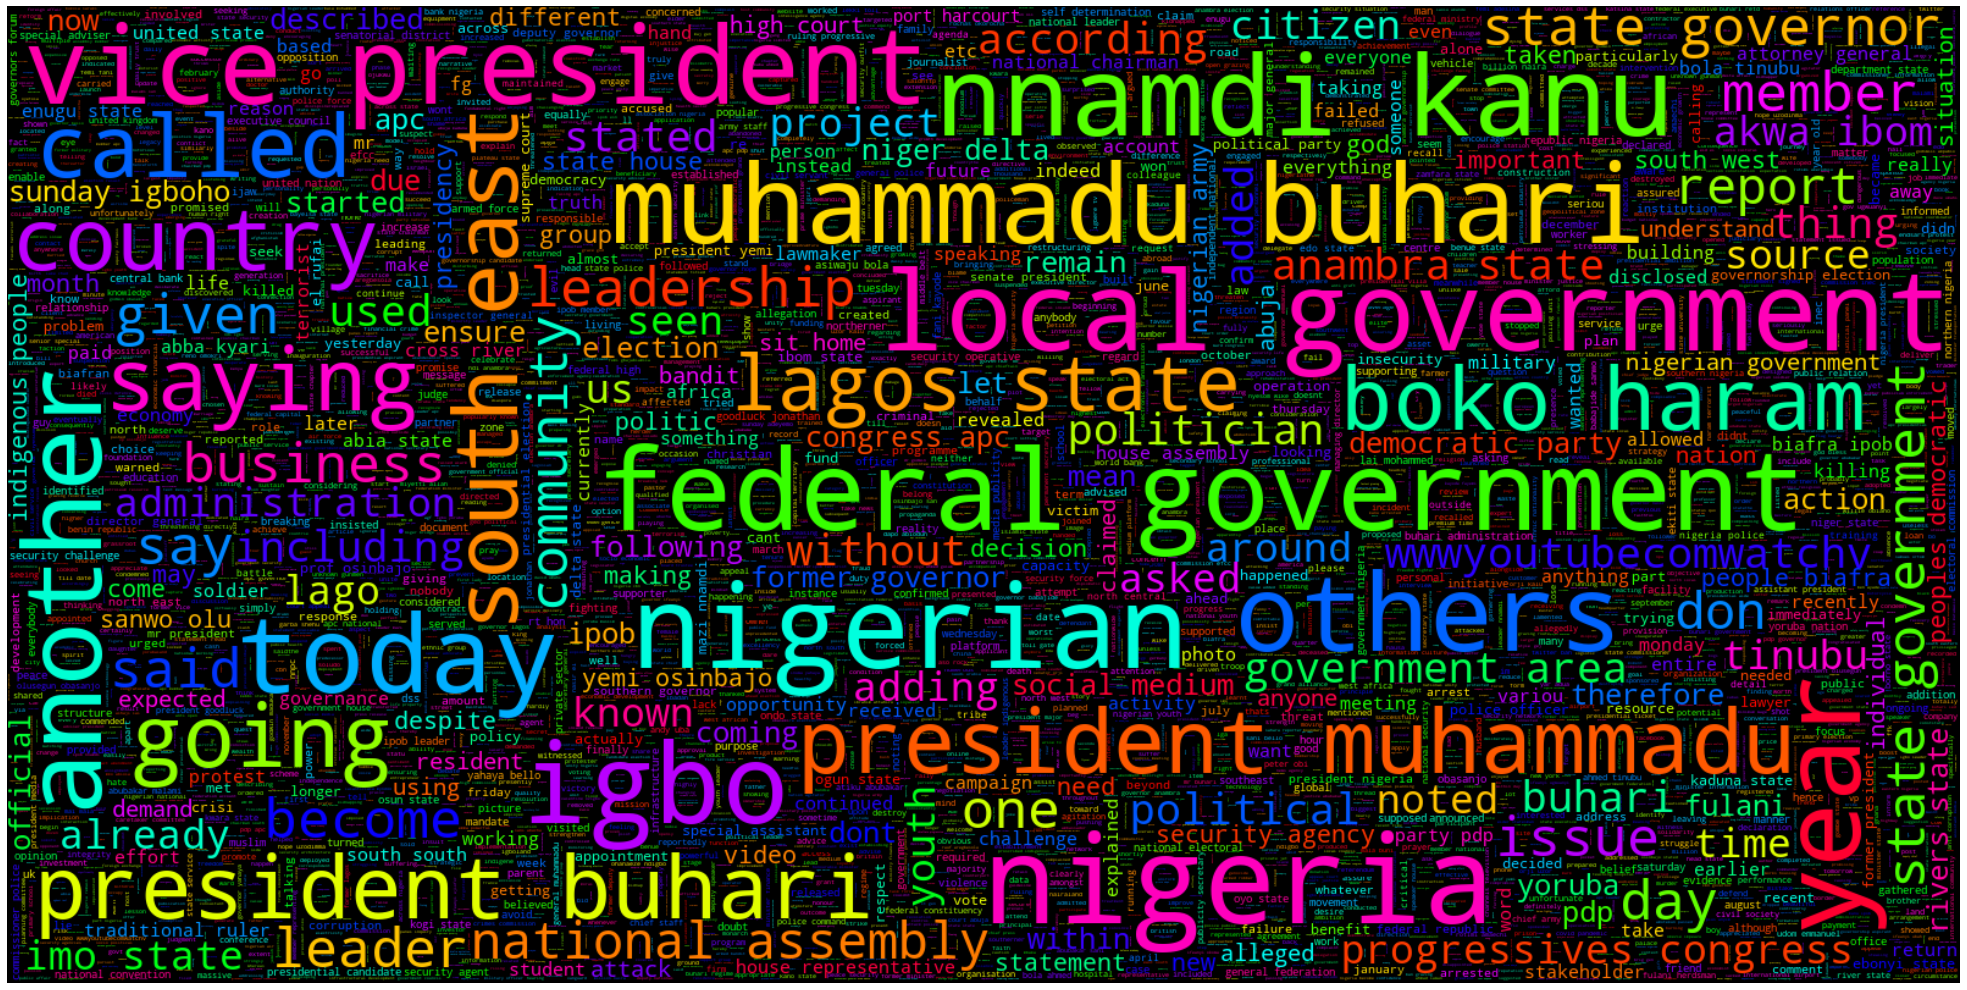

In [ ]:
#Display the Image
plt.figure(figsize=(35,35))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()